Meme Generator
----------------
This meme generator example application allows you to overlay text onto images like so:

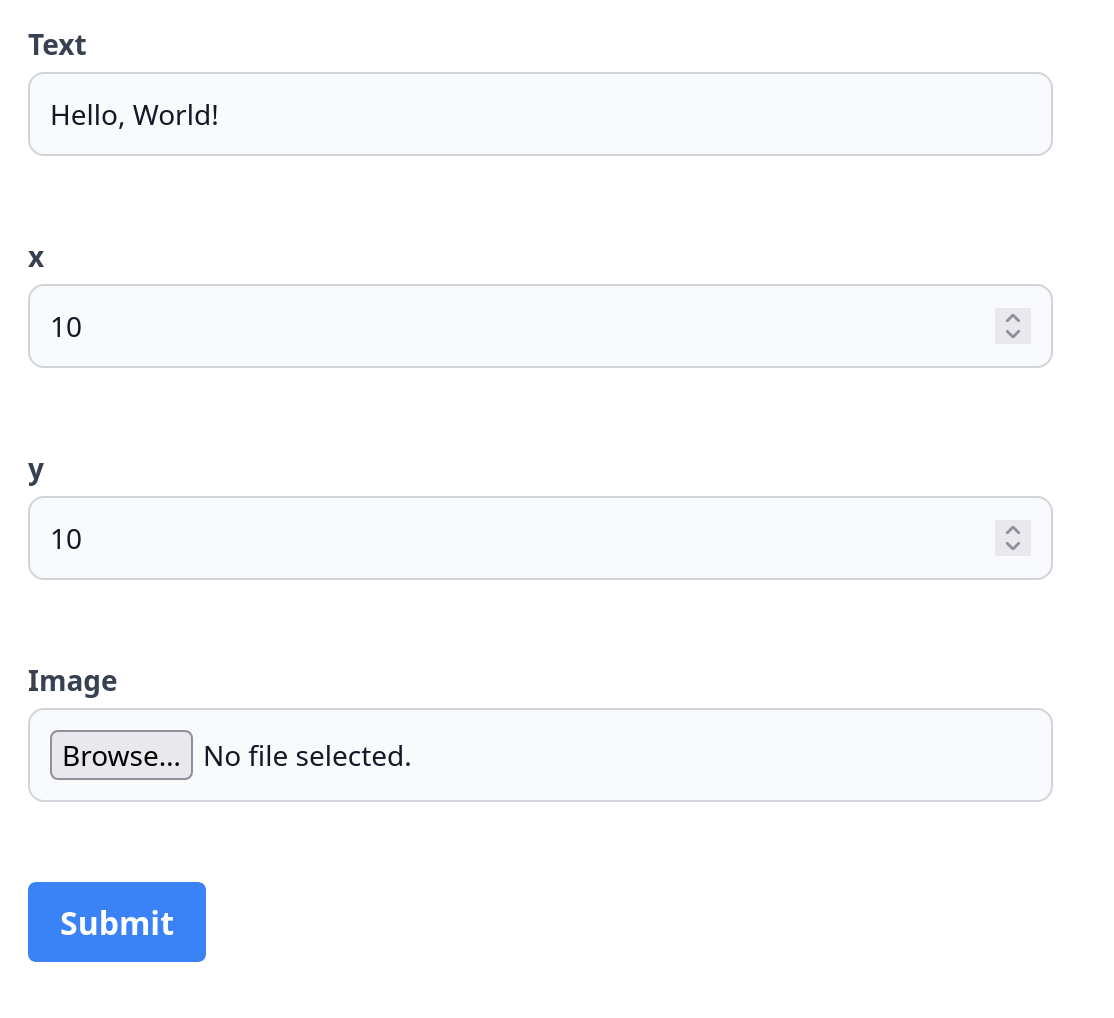

↓
---

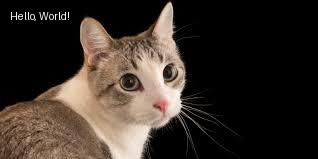


In [6]:
from bspump.jupyter import *
from bspump.http.web.server import *
import io

from PIL import Image, ImageDraw

We start with an example event so that we have something to play with.


In [1]:
event = {
    "form": {
        "text": "Hello, World!",
        "x": 10,
        "y": 10,
        "image": open("image.jpg", "rb")
    }
}

Then we define a simple web form to get the text we want to display, and the image we want to overlay.

In [5]:
auto_pipeline(
    source=lambda app, pipeline: WebFormSource(app, pipeline, route="/",
                form_intro="""<p>Type in text and upload an image to create your meme!</p>""",
                                               fields=[
        TextField("text", display="Text", default="Hello, World!"),
        IntField("x", default=10),
        IntField("y", default=10),
        FileField("image", display="Image") 
    ]),
    sink=lambda app, pipeline: WebSink(app, pipeline)
)

Pipeline section
----------------

Everything after this is rerun every time an event comes in. At run time, the `event` variable is automatically set with the value of the event that comes from the source.

We can do whatever transformations we please, and then, by setting `event` at the end of the notebook, the value of `event` will automatically be sent to the sink.

In [7]:
# Load the image from binary data in event["form"]["image"]
img = Image.open(event["form"]["image"])

# Create a drawing object
draw = ImageDraw.Draw(img)

# Add text
text = event["form"]["text"]
position = (event["form"]["x"], event["form"]["y"])
text_color = (254, 255, 255)  # White color in RGB

# Add text to image
draw.text(position, text, fill=text_color)

# Set the event response to the binary image data
buf = io.BytesIO()
img.save(buf, format="JPEG")
event["response"] = buf.getvalue()
event["content_type"] = "image/jpeg"

`#ignore` allows us to use a cell in Jupyter interactively but not have that cell included in the final application. Here we want to see the image that we just generated for debugging purposes.

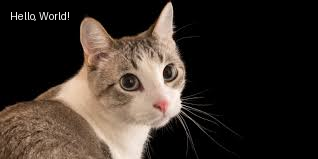

In [8]:
#ignore

display(img)